## LINEAR REGRESSION

[[0.57704541]]
[2.18951787]


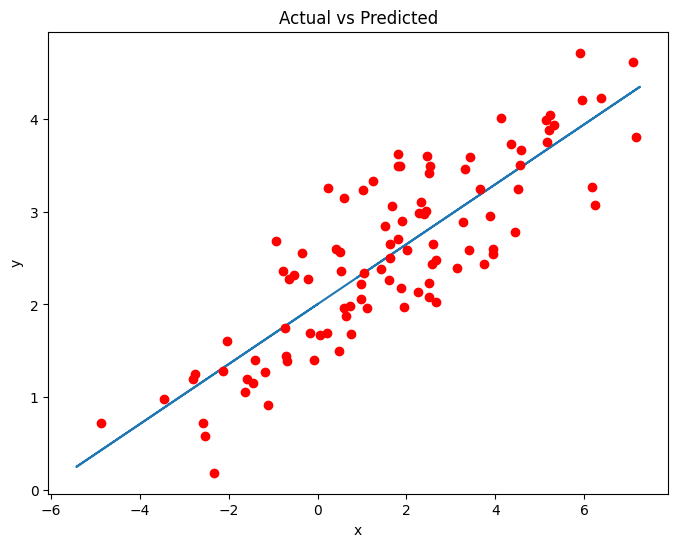

In [6]:
import numpy as np
import open3d as o3d
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Generate 'random' data
np.random.seed(0)
x = np.random.normal(1.5, 2.5, 100)   # Array of 100 values with mean = 1.5, stddev = 2.5
res = np.random.normal(0, 0.5, 100)       # Generate 100 residual terms (mean=0, std=0.5)
y = 2 + 0.3 * x + res                  # Actual values of Y


x_r = x.reshape(-1,1) #fit needs x in this shape
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x_r, y)

# Draw a new datapoint
tst_x = 2.5 * np.random.randn(1).reshape(-1,1) + 1.5   
print(tst_x)
resulting_y = model.predict(tst_x)
print(resulting_y)

new_x = 2.5 * np.random.randn(200).reshape(-1,1) + 1.5   
predicted = model.predict(new_x)
plt.figure(figsize=(8, 6))
plt.plot(new_x, predicted)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Fitting 

<br>
Assuming
Yₑ = α + β X


- β = Cov(X, Y) / Var(X).
- α = mean(Y)-β*mean(X)

</br>

In [8]:
x = np.random.normal(1.5, 2.5, 100)   # Array of 100 values with mean = 1.5, stddev = 2.5
res = np.random.normal(0, 0.5, 100) 
y = 2 + 0.3 * x + res 

# Step 1: Compute Cov(X, Y) and Var(X)
cov_xy = np.cov(x, y)[0, 1]  # Covariance between X and Y
var_x = np.var(x)            # Variance of X

# Step 2: Calculate the slope (β)
beta = cov_xy / var_x

# Step 3: Calculate the intercept (α)
alpha = np.mean(y) - beta * np.mean(x)

print(alpha, beta)


1.9500837678257712 0.30205717628757994


## Getting data from pointcloud and plotting plane through those points

[10.81363742] [[0.03244937 1.52695522]]


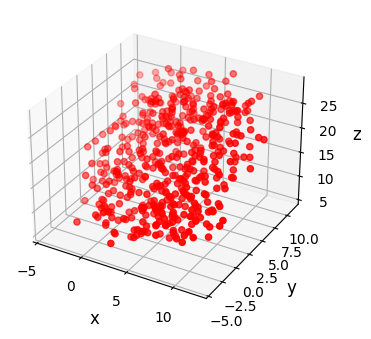

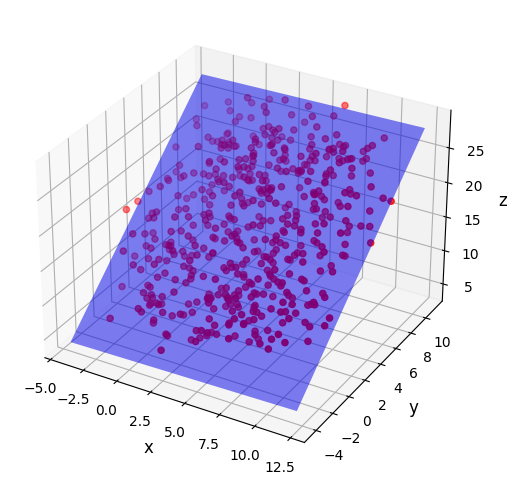

In [18]:
# Creating a pointcloud.
pc = o3d.io.read_point_cloud("TestData/spread_points.ply")
xyz = np.asarray(pc.points)


fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], color = 'red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)


## We want to predict Z
xy = xyz[:,:2] # our inputs
z = xyz[:,2].reshape(-1,1) # our targets



lm = LinearRegression()
lm.fit(xy,z)

# Get the coefficients (intercept and slopes)
print(lm.intercept_, lm.coef_)
alpha = lm.intercept_
beta_1, beta_2 = lm.coef_.flatten()

x_range = np.linspace(xyz[:, 0].min(), xyz[:, 0].max(), 10)
y_range = np.linspace(xyz[:, 1].min(), xyz[:, 1].max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = alpha + beta_1 * x_grid + beta_2 * y_grid  # Calculate corresponding z values

# Plot the point cloud and the fitted plane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], color='red', label='Data points')
ax.plot_surface(x_grid, y_grid, z_grid, color='blue', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()



## CLUSTERING AND SEGMENTING POINT CLOUDS
Clustering point clouds refers to the process of grouping points in a 3D space based on their spatial proximity or similarity. When working with 3D point clouds, the points represent the geometry of objects or scenes. Clustering helps to organize these points into meaningful groups (or clusters), which can then be used for various tasks like object detection, scene segmentation, or feature extraction.

### K-means


### DBSCAN


In [22]:
import numpy as np
import open3d as o3d
import copy
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans, k_means


def draw_labels_on_model(pcl,labels):
    cmap = plt.get_cmap("tab20")
    pcl_temp = copy.deepcopy(pcl)
    max_label = labels.max()
    print("%s has %d clusters" % (pcl_name, max_label + 1))
    colors = cmap(labels / (max_label if max_label > 0 else 1))
    colors[labels < 0] = 0
    pcl_temp.colors = o3d.utility.Vector3dVector(colors[:, :3])
    o3d.visualization.draw_geometries([pcl_temp])
    

pcl_name = 'Cube'
density = 1e4 # density of sample points to create
pcl = o3d.geometry.TriangleMesh.create_box().sample_points_uniformly(int(density))
eps = 0.4
print("%s has %d points" % (pcl_name, np.asarray(pcl.points).shape[0]))


km = KMeans(n_clusters=6, init='random',
            n_init=10, max_iter=300, tol=1e-04, random_state=0)

# Get the points from the pointcloud as nparray
xyz = np.asarray(pcl.points)

pcl.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
normals = np.asarray(pcl.normals)

xyz_n = np.concatenate((xyz, normals), axis=1)
labels = km.fit_predict(xyz)

draw_labels_on_model(pcl, labels)

o3d.visualization.draw_geometries([pcl], point_show_normal=True)




Cube has 10000 points
Cube has 6 clusters
